<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Machine_Learning_IU_Labs/blob/main/Lab_3_self_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

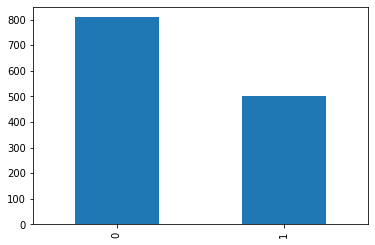

In [175]:
import pandas as pd
### write your code here. Load the dataset and plot (barplot) proportion of each class 
df = pd.read_csv("titanic.csv")

# Below dataframe was printed to see the column name of the class
# df.head()
df["survived"].value_counts().plot(kind = 'bar')

In [176]:
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

#### Preprocess the data as it has been done in the lab, feel free to adapt

In [177]:
#### preprocess the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


## `age`, `fare`, and `embarked` has 253, 2, and 1 missing values respectively so imputation is needed too, and we will also apply scaler.

## And `name` would be removed as it is not necessary

In [178]:
from sklearn.model_selection import train_test_split

def split(df, test_size_split):

   # removing name column
   df = df.drop(['name'], axis = 1)
   
   # find and print the proportion of positive samples in data
   print('% of positive samples in whole data:', sum(df['survived'] == 1) / len(df))
   
   # split data
   x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'pclass':], df['survived'],
                                                       test_size=test_size_split, stratify=df['survived'])
   
   # find and print the proportion of positive samples in train and test sets, make sure they are approx same
   print('% of positive samples in train set:', sum(y_train== 1) / len(x_train))
   print('% of positive samples in test set:', sum(y_test== 1) / len(x_test))
   return x_train, x_test, y_train, y_test

In [179]:
from sklearn.impute import SimpleImputer

def impute(x_train, x_test):
    # imputing missing values
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(x_train)
    x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
    x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)
    return x_train, x_test

## Encoding and scaling

In [180]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

def encode_scale(x_train, x_test):
    encoder = OneHotEncoder(sparse=False, drop='first')
    f_names = ['sex', 'embarked']
    encoder.fit(x_train[f_names])
    x_train = ohe_new_features(x_train, f_names, encoder)
    x_test = ohe_new_features(x_test, f_names, encoder)
    
    # feature scaling
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
    return x_train, x_test

## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

## The logistic regression function that prints accuracy, precision, and recall and returns `acccuracy`

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def logistic_regression(x_train, x_test, y_train, y_test):
    clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)
    
    print('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
    print('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))
    print('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))

    return metrics.accuracy_score(y_test, y_test_pred)

## Function to drop according to setting ratio provided above

In [185]:
### write your code here 
def drop_class_setting(drop_percent):
    to_be_removed = df[(df.survived == 1)].sample(frac=drop_percent, replace=True, random_state=42)
    df_new = df.drop(to_be_removed.index)
    print(f"New 30% dropped class: \n{df_new.survived.value_counts()}")
    print(f"\nOriginal class : \n{df.survived.value_counts()}")
    return df_new

## 1. 20% vs 80%

## Dropping from class 1 using ratio settings and creating New DataFrame

In [186]:
df_1 = drop_class_setting(drop_percent=0.2)

New 30% dropped class: 
0    809
1    409
Name: survived, dtype: int64

Original class : 
0    809
1    500
Name: survived, dtype: int64


## Splitting new dataframe (train and test), imputing, encoding, and scaling

In [187]:
# Now lets split the new dataframe

# splitting
x_train_1, x_test_1, y_train_1, y_test_1 = split(df_1, 0.2)

# imputing
x_train1_imputed, x_test1_imputed = impute(x_train_1, x_test_1)

# encoding and scaling
scaled_x_train1, scaled_x_test1 = encode_scale(x_train1_imputed, x_test1_imputed)

% of positive samples in whole data: 0.33579638752052543
% of positive samples in train set: 0.33572895277207393
% of positive samples in test set: 0.3360655737704918


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Logistic Regression for 1

In [189]:
accuracy_1 = logistic_regression(scaled_x_train1, scaled_x_test1, y_train_1, y_test_1)

Testing accuracy = 0.819672131147541
Testing precision = 0.7375
Testing recall = 0.7195121951219512


# 2. 30% vs 70%

## Dropping from class 2 using ratio settings and creating New DataFrame

In [190]:
# Dropping 30%
df_2 = drop_class_setting(drop_percent=0.3)

New 30% dropped class: 
0    809
1    371
Name: survived, dtype: int64

Original class : 
0    809
1    500
Name: survived, dtype: int64


## Splitting new dataframe (train and test), imputing, encoding, and scaling

In [191]:
# Now lets split the new dataframe

# splitting
x_train_2, x_test_2, y_train_2, y_test_2 = split(df_2, 0.2)

# imputing
x_train2_imputed, x_test2_imputed = impute(x_train_2, x_test_2)

# encoding and scaling
scaled_x_train2, scaled_x_test2 = encode_scale(x_train2_imputed, x_test2_imputed)

% of positive samples in whole data: 0.31440677966101693
% of positive samples in train set: 0.3146186440677966
% of positive samples in test set: 0.3135593220338983


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Logistic Regression for 2

In [192]:
accuracy_2 = logistic_regression(scaled_x_train2, scaled_x_test2, y_train_2, y_test_2)

Testing accuracy = 0.7966101694915254
Testing precision = 0.6710526315789473
Testing recall = 0.6891891891891891


# 3. 40% vs 60%

## Dropping from class 3 using ratio settings and creating New DataFrame

In [193]:
# Dropping 30%
df_3 = drop_class_setting(drop_percent=0.4)

New 30% dropped class: 
0    809
1    338
Name: survived, dtype: int64

Original class : 
0    809
1    500
Name: survived, dtype: int64


## Splitting new dataframe (train and test), imputing, encoding, and scaling

In [194]:
# Now lets split the new dataframe

# splitting
x_train_3, x_test_3, y_train_3, y_test_3 = split(df_3, 0.2)

# imputing
x_train3_imputed, x_test3_imputed = impute(x_train_3, x_test_3)

# encoding and scaling
scaled_x_train3, scaled_x_test3 = encode_scale(x_train3_imputed, x_test3_imputed)

% of positive samples in whole data: 0.2946817785527463
% of positive samples in train set: 0.29443838604143946
% of positive samples in test set: 0.2956521739130435


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Logistic Regression for 3

In [195]:
accuracy_3 = logistic_regression(scaled_x_train3, scaled_x_test3, y_train_3, y_test_3)

Testing accuracy = 0.8521739130434782
Testing precision = 0.8269230769230769
Testing recall = 0.6323529411764706


## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

Text(0, 0.5, 'Accuracy')

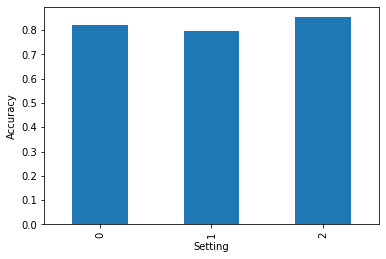

In [201]:
#### write your code 
# Lets create the array of classes
import matplotlib.pyplot as plt 
import numpy as np
imbalance = np.array([[1, 2, 3]]).T

# Lets create the dataframe and plot the barplot
df_accuracies = pd.DataFrame(imbalance, columns = ['Setting'])
df_accuracies["Accuracy(%)"] = [accuracy_1, accuracy_2, accuracy_3]
df_accuracies["Accuracy(%)"].plot(kind = 'bar')
plt.xlabel('Setting')
plt.ylabel('Accuracy')

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

The performed significantly different in all three situations. on 30% it showed a little worse than 20% drop, however on 40% drop, it showed the best performance of all three. Although stratification was applied so we can say that the result is not biased.